In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("form_1.csv")
df_2 = pd.read_csv("form_2.csv")
df_3 = pd.read_csv('forms.csv')

df_faba = pd.read_csv('../researcher_data_priv/faba_success.csv')
# print(df.head())
print(df_faba)

    Participant  Attempt_1  Attempt_2  Attempt_3
0             1          0          1          1
1             2          1          1          1
2             3          0          0          0
3             4          1          1          1
4             5          1          1          1
5             6          0          0          0
6             7          0          0          0
7             8          0          1          1
8             9          0          0          1
9            10          0          1          0
10           11          0          0          0
11           12          0          0          0
12           13          1          0          1
13           14          1          1          0
14           15          0          1          0
15           16          1          1          1


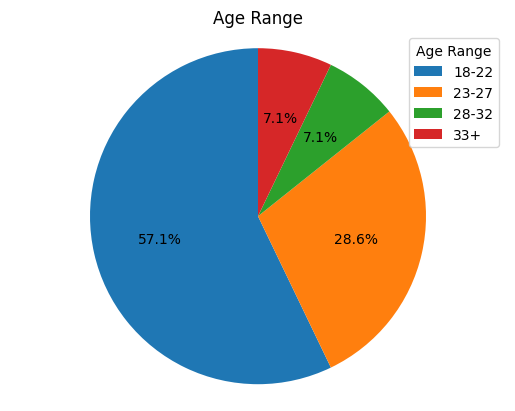

In [85]:
#4
field_counts = df["Age_Range"].value_counts()

plt.figure()
wedges, texts, autotexts = plt.pie(
    field_counts,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Age Range")
plt.axis('equal')  # supaya pie bulat

# Tambahkan legend
plt.legend(
    wedges,
    field_counts.index,
    title="Age Range",
    loc="best"
)

plt.show()



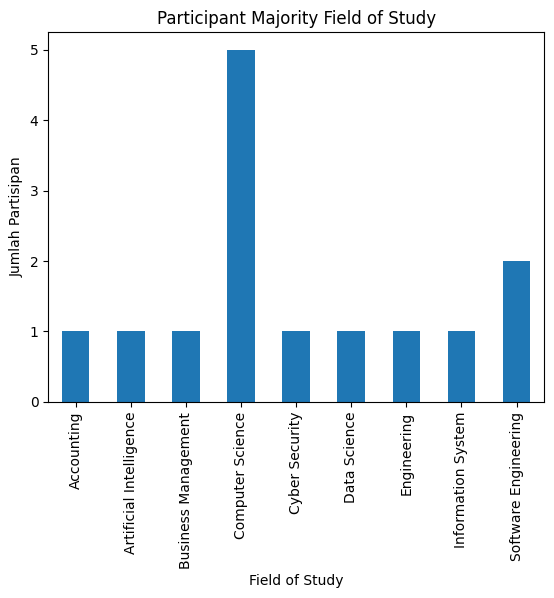

In [86]:
#3
counts = df["Field_of_Study"].value_counts().sort_index()

plt.figure()
counts.plot(kind="bar")
plt.title("Participant Majority Field of Study")
plt.xlabel("Field of Study")
plt.ylabel("Jumlah Partisipan")
plt.show()


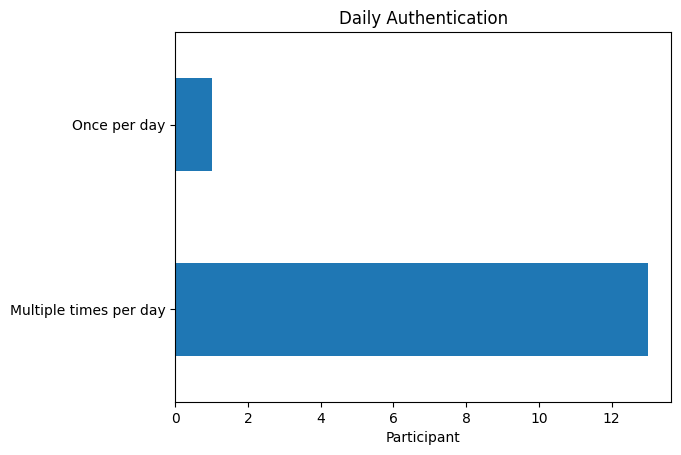

In [87]:
# Laptop on Time Screen
counts = df["Laptop_OnTimeScreen"].value_counts()

plt.figure()
counts.plot(kind="barh")
plt.title("Daily Authentication")
plt.xlabel("Participant")
plt.ylabel("")

plt.show()


Text(0.5, 0, 'Participant')

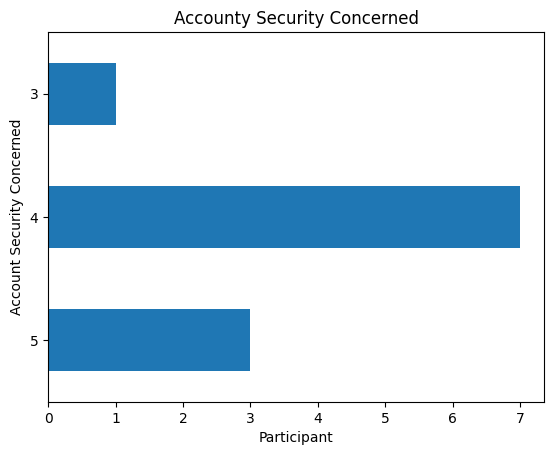

In [88]:
counts = df_3["account_security"].value_counts().sort_index(ascending=False)

plt.figure()
counts.plot(kind="barh")
plt.title("Accounty Security Concerned")
plt.ylabel("Account Security Concerned")
plt.xlabel("Participant")


Authenticator_Tool
Google Authenticator (6-digit codes)         11
Biometric (fingerprint, face recognition)     9
SMS text message codes                        8
Email verification codes                      7
Hardware token (YubiKey, etc.)                1
Authenticator microsoft                       1
Duo Mobile (push notifications)               1
Name: count, dtype: int64


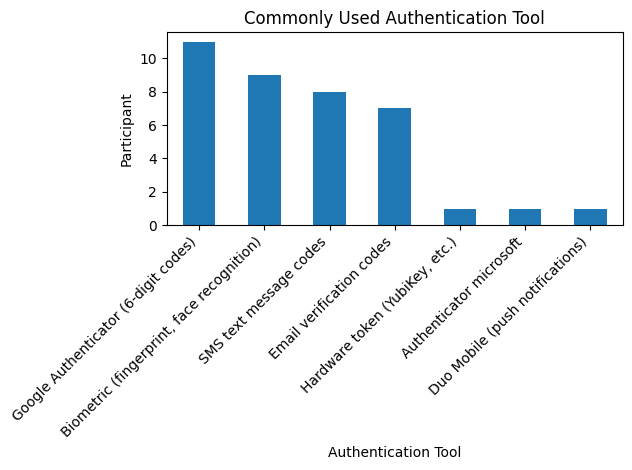

Authenticator_Tool
Google Authenticator (6-digit codes)         11
Biometric (fingerprint, face recognition)     9
SMS text message codes                        8
Email verification codes                      7
Hardware token (YubiKey, etc.)                1
Authenticator microsoft                       1
Duo Mobile (push notifications)               1
Name: count, dtype: int64


In [89]:
# Common Used Authenticator
methods_series = (
    df_3["Authenticator_Tool"]
    .dropna()
    .str.split(r",\s(?![^()]*\))")  
    .explode()
    .str.strip()
)

method_counts = methods_series.value_counts()
print(method_counts)


plt.figure()
method_counts.plot(kind="bar")
plt.title("Commonly Used Authentication Tool")
plt.xlabel("Authentication Tool")
plt.ylabel("Participant")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(method_counts)


Data FABA:
   Participant  Attempt_1  Attempt_2  Attempt_3
0            1          0          1          1
1            2          1          1          1
2            3          0          0          0
3            4          1          1          1
4            5          1          1          1

Data DUO:
   Participant  Attempt_1  Attempt_2  Attempt_3 
0            1          1          1           1
1            2          1          1           1
2            3          1          1           1
3            4          1          1           1
4            5          1          1           1


KeyError: 'Attempt_3'

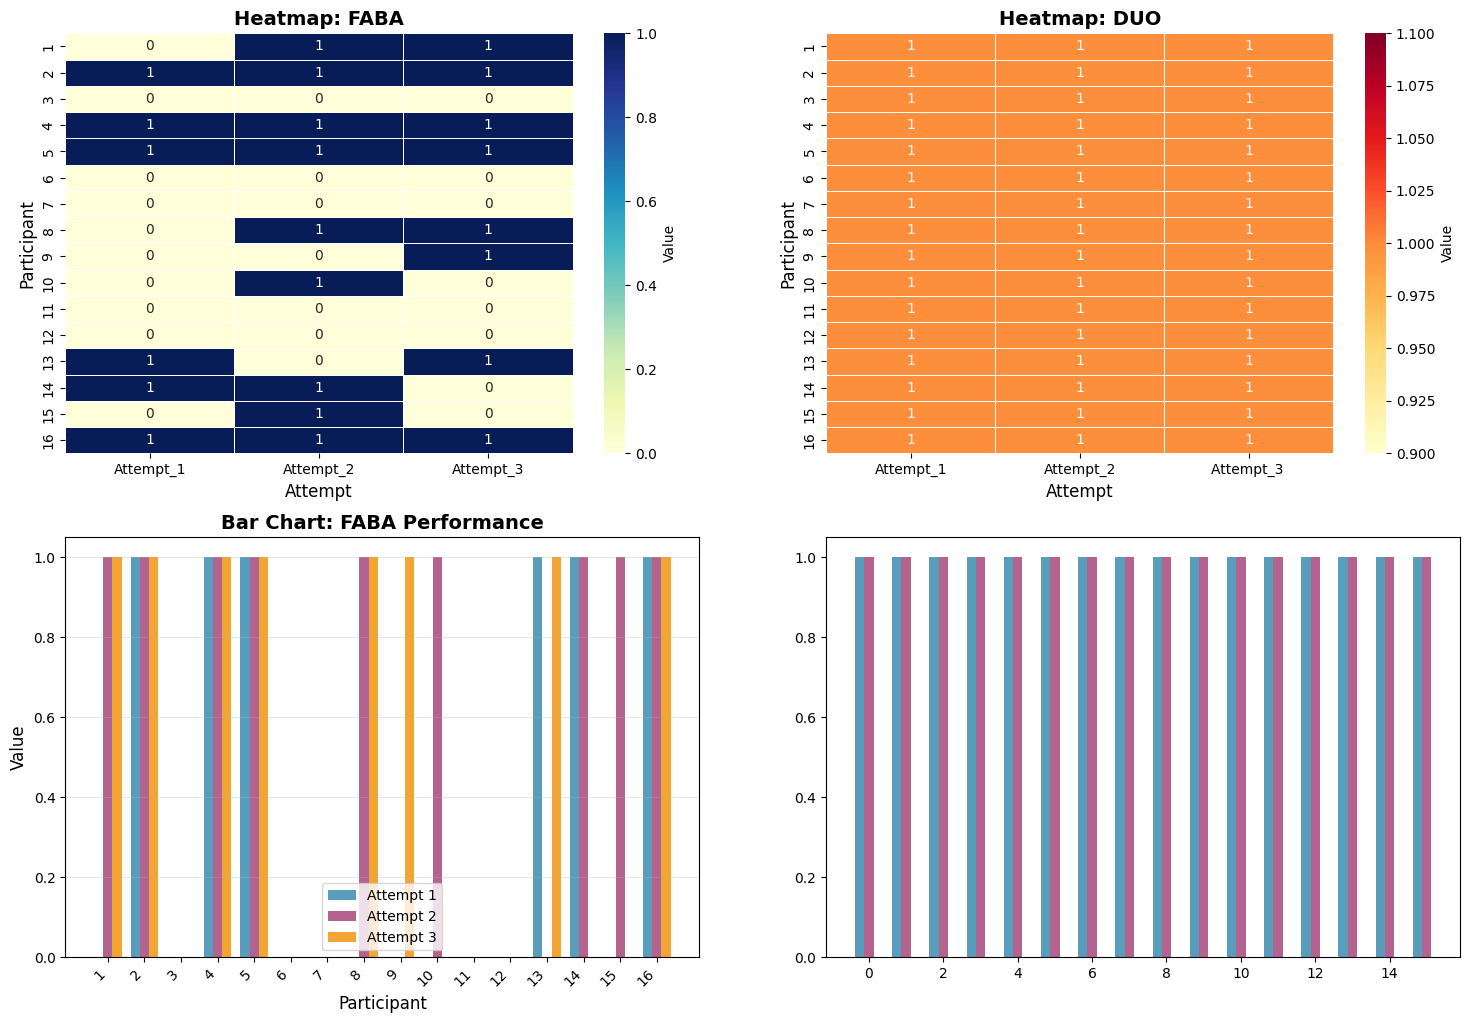

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file CSV
df_faba = pd.read_csv('../researcher_data_priv/faba_success.csv')
df_duo = pd.read_csv("../researcher_data_priv/duo_success.csv")

print("Data FABA:")
print(df_faba.head())
print("\nData DUO:")
print(df_duo.head())

# Membuat figure dengan 4 subplot (2 baris, 2 kolom)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ====== BARIS 1: HEATMAPS ======

# Plot 1: Heatmap FABA (kiri atas)
ax1 = axes[0, 0]
df_plot_faba = df_faba.set_index('Participant')
sns.heatmap(df_plot_faba, annot=True, fmt='d', cmap='YlGnBu', 
            cbar_kws={'label': 'Value'}, ax=ax1, linewidths=0.5)
ax1.set_title('Heatmap: FABA', fontsize=14, fontweight='bold')
ax1.set_ylabel('Participant', fontsize=12)
ax1.set_xlabel('Attempt', fontsize=12)

# Plot 2: Heatmap DUO (kanan atas)
ax2 = axes[0, 1]
df_plot_duo = df_duo.set_index('Participant')
sns.heatmap(df_plot_duo, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Value'}, ax=ax2, linewidths=0.5)
ax2.set_title('Heatmap: DUO', fontsize=14, fontweight='bold')
ax2.set_ylabel('Participant', fontsize=12)
ax2.set_xlabel('Attempt', fontsize=12)

# ====== BARIS 2: BAR CHARTS ======

# Plot 3: Bar Chart FABA (kiri bawah)
ax3 = axes[1, 0]
x_faba = range(len(df_faba))
width = 0.25

ax3.bar([i - width for i in x_faba], df_faba['Attempt_1'], width, 
        label='Attempt 1', alpha=0.8, color='#2E86AB')
ax3.bar(x_faba, df_faba['Attempt_2'], width, 
        label='Attempt 2', alpha=0.8, color='#A23B72')
ax3.bar([i + width for i in x_faba], df_faba['Attempt_3'], width, 
        label='Attempt 3', alpha=0.8, color='#F18F01')

ax3.set_title('Bar Chart: FABA Performance', fontsize=14, fontweight='bold')
ax3.set_xlabel('Participant', fontsize=12)
ax3.set_ylabel('Value', fontsize=12)
ax3.set_xticks(x_faba)
ax3.set_xticklabels(df_faba['Participant'], rotation=45, ha='right')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Bar Chart DUO (kanan bawah)
ax4 = axes[1, 1]
x_duo = range(len(df_duo))

ax4.bar([i - width for i in x_duo], df_duo['Attempt_1'], width, 
        label='Attempt 1', alpha=0.8, color='#2E86AB')
ax4.bar(x_duo, df_duo['Attempt_2'], width, 
        label='Attempt 2', alpha=0.8, color='#A23B72')
ax4.bar([i + width for i in x_duo], df_duo['Attempt_3'], width, 
        label='Attempt 3', alpha=0.8, color='#F18F01')

ax4.set_title('Bar Chart: DUO Performance', fontsize=14, fontweight='bold')
ax4.set_xlabel('Participant', fontsize=12)
ax4.set_ylabel('Value', fontsize=12)
ax4.set_xticks(x_duo)
ax4.set_xticklabels(df_duo['Participant'], rotation=45, ha='right')
ax4.legend(loc='best')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()